In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
sns.set_style('whitegrid')
# read data
market_df = pd.read_csv('data/global_sales_data/market_fact.csv')
customer_df = pd.read_csv('data/global_sales_data/cust_dimen.csv')
product_df = pd.read_csv('data/global_sales_data/prod_dimen.csv')
shipping_df = pd.read_csv('data/global_sales_data/shipping_dimen.csv')
orders_df = pd.read_csv('data/global_sales_data/orders_dimen.csv')

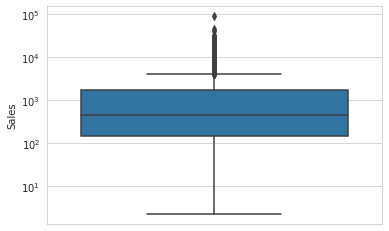

In [6]:
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()

In [17]:
df = pd.merge(market_df,product_df,how='inner',on='Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


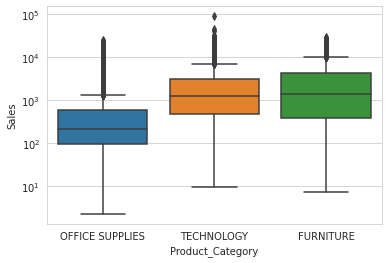

In [10]:
# boxplot a variable across various product categories
sns.boxplot(x='Product_Category',y='Sales',data=df)
plt.yscale('log')
plt.show()

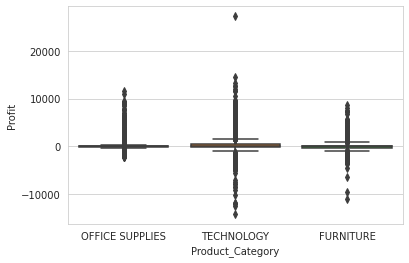

In [13]:
sns.boxplot(x='Product_Category',y='Profit',data=df)
# plt.yscale('log')
# to many outliers even with a log graph
plt.show()

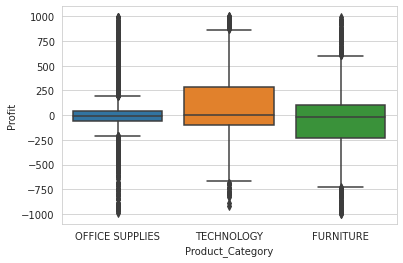

In [18]:
df = df[(df['Profit']<1000) & (df['Profit']>-1000)]
sns.boxplot(x='Product_Category',y='Profit',data=df)
plt.show()

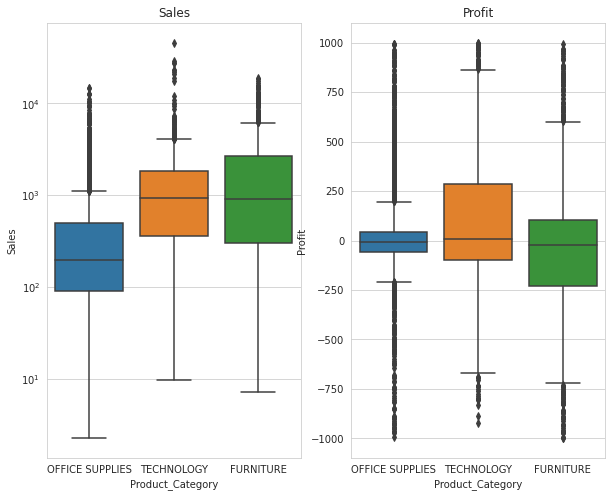

In [25]:
plt.figure(figsize=(10,8))

# subplot Sales
plt.subplot(1,2,1)
sns.boxplot(x='Product_Category',y='Sales',data=df)
plt.yscale('log')
plt.title('Sales')

# subplot Profit
plt.subplot(1,2,2)
sns.boxplot(x='Product_Category',y='Profit',data=df)
plt.title('Profit')
#
# plt.subplots_adjust(wspace=0.5)

plt.show()

In [26]:
df = pd.merge(df,customer_df,how='inner',on='Cust_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,Customer_Name,Province,Region,Customer_Segment
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON BERGMAN,ALBERTA,WEST,CORPORATE
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,OFFICE SUPPLIES,PENS & ART SUPPLIES,AARON BERGMAN,ALBERTA,WEST,CORPORATE
2,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
3,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,OFFICE SUPPLIES,PAPER,AARON BERGMAN,ALBERTA,WEST,CORPORATE
4,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS",AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE


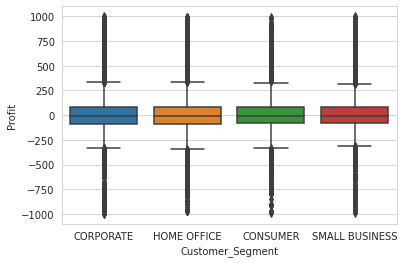

In [27]:
sns.boxplot(x='Customer_Segment',y='Profit',data=df)
plt.show()